# 📉📊📈**Stock Price Prediction with Machine Learning Models**📉📊📈


Because of its complexity and difficulty, forecasting stock prices fascinates researchers and industry specialists from a variety of fields, including computer science, economics, business arithmetic, and marketing. Despite considerable attempts over the last decade, stock market price forecasting remains difficult due to the intrinsic random wandering nature of market prices. Stock price volatility creates significant challenges for precise forecasting. Nonetheless, establishing efficient and accurate forecasting models is critical for managers, investors, and decision-makers to make sound investment decisions. Analysts use machine learning techniques to evaluate historical data and uncover patterns and trends that might assist forecast future stock performance. Researchers try to create prediction models that can efficiently manage the unpredictable nature of stock markets by combining current and historical data.

# ✅ **Bayesian Ridge Regression** ✅



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

# **Import Libraries**

In [13]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into the Data Frame**

In [17]:
import pandas as pd

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/yahoo_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and format the date column
df.head().style.format({'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d')})


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


# **Data Preprocessing**

In [40]:
import pandas as pd
import numpy as np

# Assuming 'df' is the DataFrame containing your dataset

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert columns to numeric type
df['Open'] = df['Open'].replace(',', '', regex=True).astype(float)
df['High'] = df['High'].replace(',', '', regex=True).astype(float)
df['Low'] = df['Low'].replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace(',', '', regex=True).astype(float)
df['Adj Close'] = df['Adj Close'].replace(',', '', regex=True).astype(float)
df['Volume'] = df['Volume'].replace(',', '', regex=True).astype(int)

# Calculate the new columns based on the modified dataset
df['Increase_Decrease'] = np.where(df['Volume'].shift(-1) > df['Volume'], 1, 0)
df['Buy_Sell_on_Open'] = np.where(df['Open'].shift(-1) > df['Open'], 1, 0)
df['Buy_Sell'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'], 1, 0)
df['Returns'] = df['Adj Close'].pct_change()

# Drop rows with NaN values
df = df.dropna()

# Display the modified dataset
print(df.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
2 2023-04-26  33596.34  33645.83  33235.85  33301.87   33301.87  321170000   
3 2023-04-25  33828.34  33875.49  33525.39  33530.83   33530.83  297880000   
4 2023-04-24  33805.04  33891.15  33726.09  33875.40   33875.40  252020000   
5 2023-04-21  33793.60  33858.83  33688.57  33808.96   33808.96  291080000   
6 2023-04-20  33740.60  33875.39  33677.74  33786.62   33786.62  307910000   

   Increase_Decrease  Buy_Sell_on_Open  Buy_Sell   Returns  
2                  0                 1         1 -0.015500  
3                  0                 0         1  0.006875  
4                  1                 0         0  0.010276  
5                  1                 0         0 -0.001961  
6                  0                 1         1 -0.000661  


In [41]:
#View Dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,0,1,1,-0.015500
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,0,0,1,0.006875
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,1,0,0,0.010276
5,2023-04-21,33793.60,33858.83,33688.57,33808.96,33808.96,291080000,1,0,0,-0.001961
6,2023-04-20,33740.60,33875.39,33677.74,33786.62,33786.62,307910000,0,1,1,-0.000661
...,...,...,...,...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000,1,0,0,-0.000119
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000,1,0,0,-0.003892
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000,0,1,0,-0.013699
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000,0,1,1,-0.000216


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Dataset Cleaning and Null Value Testing**

In [42]:
# See how many null values in each column

df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

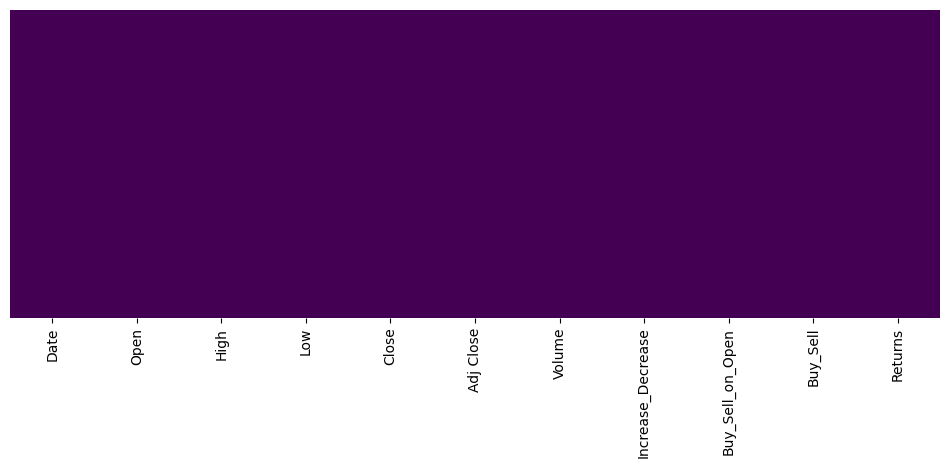

In [43]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [44]:
# see number of rows, number of columns
df.shape

(1256, 11)

In [45]:
#TOTAL NUMBER OF RECORDS
df.size
print("Total number of records = ",df.size)

Total number of records =  13816


In [46]:
# see columns names

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [47]:
#View Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 2 to 1257
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1256 non-null   datetime64[ns]
 1   Open               1256 non-null   float64       
 2   High               1256 non-null   float64       
 3   Low                1256 non-null   float64       
 4   Close              1256 non-null   float64       
 5   Adj Close          1256 non-null   float64       
 6   Volume             1256 non-null   int64         
 7   Increase_Decrease  1256 non-null   int64         
 8   Buy_Sell_on_Open   1256 non-null   int64         
 9   Buy_Sell           1256 non-null   int64         
 10  Returns            1256 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 117.8 KB


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Increase_Decrease'}>,
        <Axes: title={'center': 'Buy_Sell_on_Open'}>],
       [<Axes: title={'center': 'Buy_Sell'}>,
        <Axes: title={'center': 'Returns'}>, <Axes: >]], dtype=object)

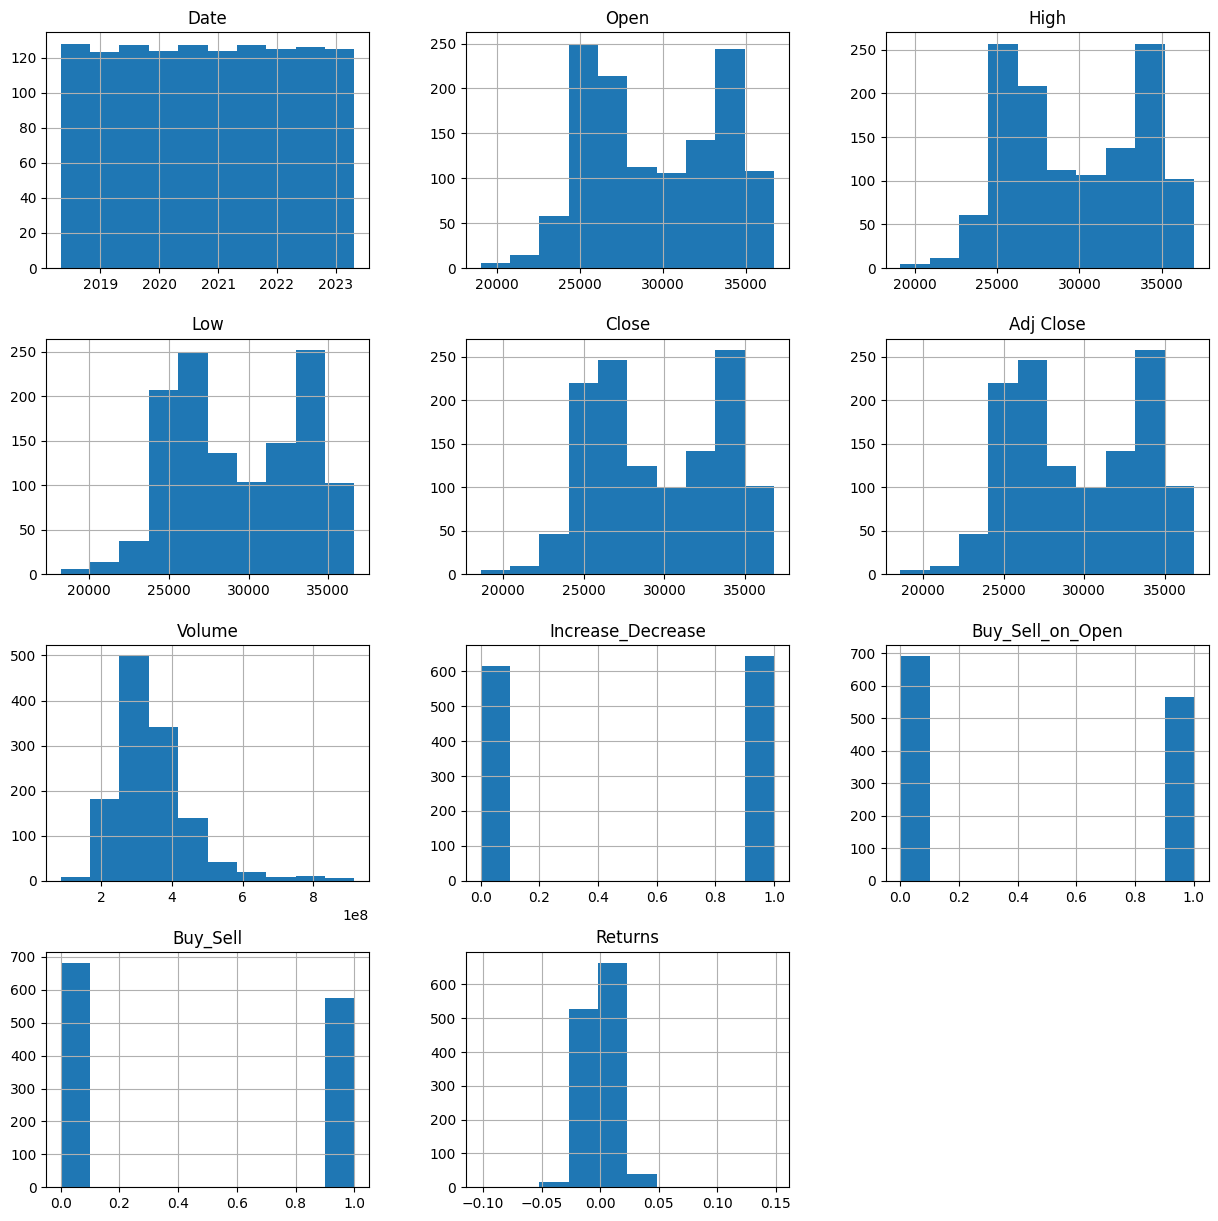

In [48]:
# Histogram per each numerical column

df.hist(figsize=(15, 15))

In [49]:
# The statistics per each column

df.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.000000,1256.000000,1256.000000
mean,29589.463615,29770.249546,29395.825390,29592.414546,29592.414546,3.450577e+08,0.511146,0.450637,0.457006,-0.000178
std,4006.084312,4008.678662,4004.703535,4006.867706,4006.867706,1.069990e+08,0.500075,0.497756,0.498347,0.013667
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07,0.000000,0.000000,0.000000,-0.102052
25%,26039.980000,26162.082500,25875.690000,26025.980000,26025.980000,2.772025e+08,0.000000,0.000000,0.000000,-0.006232
50%,29172.725000,29325.180000,28981.320000,29191.155000,29191.155000,3.245750e+08,1.000000,0.000000,0.000000,-0.000710
75%,33598.902500,33812.642500,33342.837500,33596.937500,33596.937500,3.876200e+08,1.000000,1.000000,1.000000,0.004718
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08,1.000000,1.000000,1.000000,0.148456


# **Define X and Y**

In [50]:
X = df['Open'].values.reshape(1256,-1)
y = df['Adj Close'].values.reshape(1256,-1)

In [51]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [52]:
model.coef_

array([0.99778593])

In [53]:
model.scores_

array([-11580.25045677,  -8855.55533932,  -8855.55533381])

# **Split Train Data and Test Data**

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# **Dataset Traning and Model Traning**

In [57]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [58]:
model.coef_

array([0.99834636])

In [59]:
model.scores_

array([-8676.11227658, -6619.41180156, -6619.4117878 , -6619.4117878 ])

# **Comparison of Actual Values and Predicted Values**

In [60]:
y_pred = model.predict(X_test)

# **Accuracy and Loss Function Values of the Model**

In [61]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean_Absolute_Error(MAE): 212.1244901111817
Mean_Squared_Error(MSE): 88499.93282967183
Root_Mean_Squared_Error(RMSE): 297.48938271755486


In [62]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9947976502144797


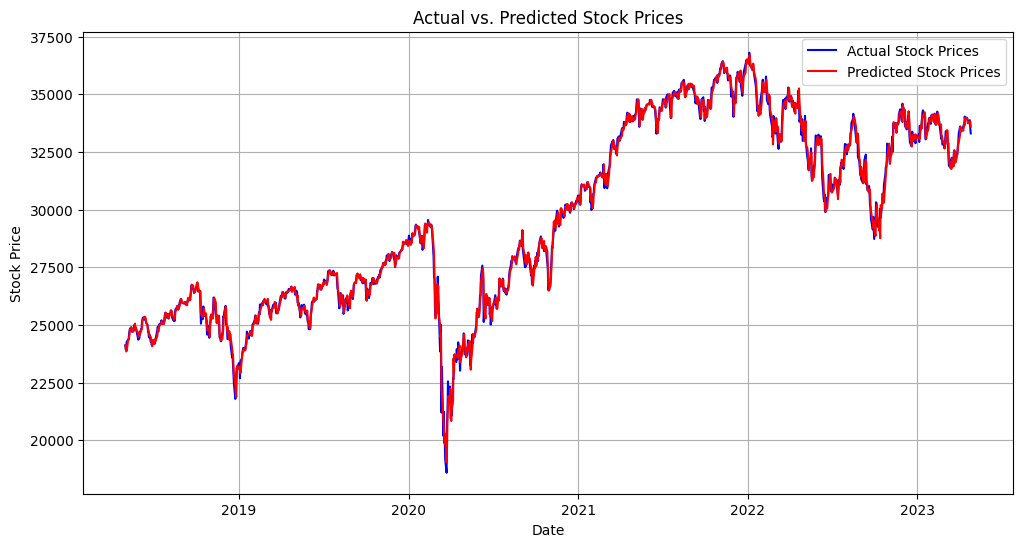

In [64]:
import matplotlib.pyplot as plt

# Plotting the actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Actual Stock Prices', color='blue')

# Plotting the predicted stock prices for the entire dataset
plt.plot(df['Date'], model.predict(X), label='Predicted Stock Prices', color='red')

plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
